# Algorithme de Krigeage

In [1]:
# Importations
import openturns as ot
import openturns.viewer as viewer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Principe du Krigeage

**Définitions**
* L'**interpolation** désigne l'action d'intercaler dans une série de valeurs connues des valeurs intermédiaires.

* Quelque chose de **stochastique** est quelque chose qui est le produit du hasard.

* Le **Krigeage** est une méthode stochastique d'interpolation spatiale qui prévoit la valeur d'un phénomène en des lieux non échantillonés et à variance minimale.

* Les **instances** d'une classe sont les éléments de cette classe.

* Un **métamodèle** est un modèle dont les instances sont des modèles. C'est un type particulier de modèle, il regroupe une classe de modèles.

**Traductions utiles**

* Le *sample* est l'échantillon.

**Pourquoi fait-on cela ?**

* Pour prédire l'évolution des $\epsilon_{i,j}^{(n)}$. On construit pour cela un méta-modèle par famille de courbes.

## Présentation de la méthode de Krigeage

**Paramètres**

* `inputSample` et `outputSample` : les points de la courbe qui sert de modèle. On peut utiliser des vecteurs :
$$
(x_i)_{1 \leq i \leq N} \in (\mathbb{R}^d)^N, (y_i)_{1 \leq i \leq N} \in (\mathbb{R}^p)^N
$$
* `covarianceModel` : le modèle de covariance utilisé pour décrire la gaussienne.
* `Basis` : $(\phi_i)_{1\leq i\leq n_1}$ famille libre de fonctions de $\mathbb{R}^d \rightarrow \mathbb{R}^p$ dans laquelle on peut décomposer la fonction $\mu$ et ainsi estimer $y = \mathbb{M}(x)$.
* `BasisCollection` $p$ bases de fonctions si l'on souhaite changer selon la coordonnée de $y$ sur laquelle on travaille.

**Gaussian process**

$$ Y(\omega, x) = \mu(x) + W(\omega, x)$$

avec :
* $\mu \in \mathbb{R}^p$ telle que $\mu^{(j)}(x) = \sum_{i=0}^n \beta_i^{(j)} \phi_i^{(j)}(x)  $
* $W \in \mathbb{R}^p$ un Gaussian process centré, de fonction de covariance $C$ (teaser...)

**Fonction de covariance**

$$ C : (\theta, \sigma, R, \lambda) \rightarrow C(\theta, \sigma, R, \lambda) $$

## Programmation

Création du modèle $\mathbb{M}$ et de l'échantillon.

In [2]:
f = ot.SymbolicFunction(['x'], ['x * sin(x)'])
sampleX = np.arange(10).reshape((10,1))
sampleY = f(sampleX)

Création de l'algorithme

In [3]:
basis = ot.Basis([ot.SymbolicFunction(['x'], ['x']), ot.SymbolicFunction(['x'], ['x^2'])])
covarianceModel = ot.SquaredExponential([1.0])
covarianceModel.setActiveParameter([])
algo = ot.KrigingAlgorithm(sampleX, sampleY, covarianceModel, basis)
algo.run()

Obtention du métamodèle

In [4]:
result = algo.getResult()
metamodel = result.getMetaModel()

## Application à un exemple et tracés

In [5]:
ot.Log.Show(ot.Log.NONE)

Fonction dont on veut créer un méta-modèle

In [6]:
g = ot.SymbolicFunction(['x'], ['sin(x)'])

Création de l'échantillon

In [7]:
x_train = ot.Sample([[x] for x in [1.,3.,4.,6.,7.9,11., 11.5]])
y_train = g(x_train)
n_train = x_train.getSize()
n_train

7

On teste le métamodèle sur des points aléatoires où le modèle est défini.

In [8]:
xmin = 0.
xmax = 12.
n_test = 100
step = (xmax-xmin)/(n_test-1)
myRegularGrid = ot.RegularGrid(xmin, step, n_test)
x_test_coord = myRegularGrid.getValues()
x_test = ot.Sample([[x] for x in x_test_coord])
y_test = g(x_test)

Le code suivant ploat la fonction et son métamodèle.

In [9]:
def plot_data_train(x_train,y_train):
    '''Plot the data (x_train,y_train) as a Cloud, in red'''
    graph_train = ot.Cloud(x_train,y_train)
    graph_train.setColor("red")
    graph_train.setLegend("Data")
    return graph_train

In [10]:
def plot_data_test(x_test,y_test):
    '''Plot the data (x_test,y_test) as a Curve, in dashed black'''
    graphF = ot.Curve(x_test,y_test)
    graphF.setLegend("Exact")
    graphF.setColor("black")
    graphF.setLineStyle("dashed")
    return graphF

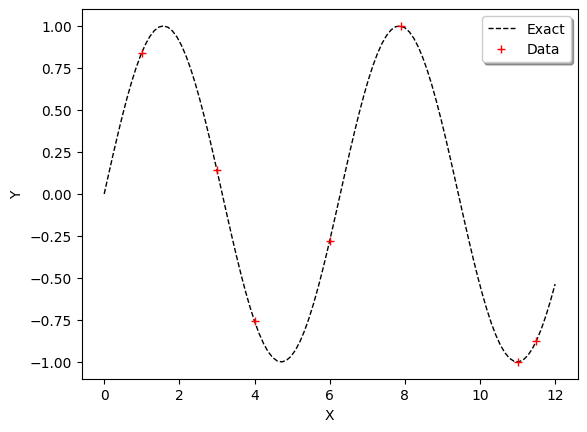

In [11]:
graph = ot.Graph()
graph.add(plot_data_test(x_test,y_test))
graph.add(plot_data_train(x_train,y_train))
graph.setAxes(True)
graph.setXTitle("X")
graph.setYTitle("Y")
graph.setLegendPosition("topright")
view = viewer.View(graph)

In [12]:
dimension = 1
basis = ot.ConstantBasisFactory(dimension).build()
covarianceModel = ot.MaternModel([1.]*dimension, 1.5)
algo = ot.KrigingAlgorithm(x_train, y_train, covarianceModel, basis)
algo.run()
krigingResult = algo.getResult()
krigingResult

class=KrigingResult, basis=[class=Basis coll=[class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0] evaluationImplementation=class=LinearEvaluation name=Unnamed center=class=Point name=Unnamed dimension=1 values=[0] constant=class=Point name=Unnamed dimension=1 values=[1] linear=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0] gradientImplementation=class=ConstantGradient name=Unnamed constant=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0] hessianImplementation=class=NullHessian name=Unnamed inputDimension=1 outputDimension=1]], trend coefficients=[class=Point name=Unnamed dimension=1 values=[0.00736751]], covariance models=class=MaternModel scale=class=Point name=Unnamed dimension=1 values=[1.27453] amplitude=class=Point name=Unnamed dimension=1 values=[0.822263] nu=1.5, covariance coefficients=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=7 dimension=1 data=[[1.13904],[1.01762],[-1.76279],[-0.559148],[1.78757],[-1.61946],[-0.00283269]]

In [13]:
krigeageMM = krigingResult.getMetaModel()
y_test_MM = krigeageMM(x_test)

In [14]:
def plot_data_kriging(x_test,y_test_MM):
    '''Plots (x_test,y_test_MM) from the metamodel as a Curve, in blue'''
    graphK = ot.Curve(x_test,y_test_MM)
    graphK.setColor("blue")
    graphK.setLegend("Kriging")
    return graphK

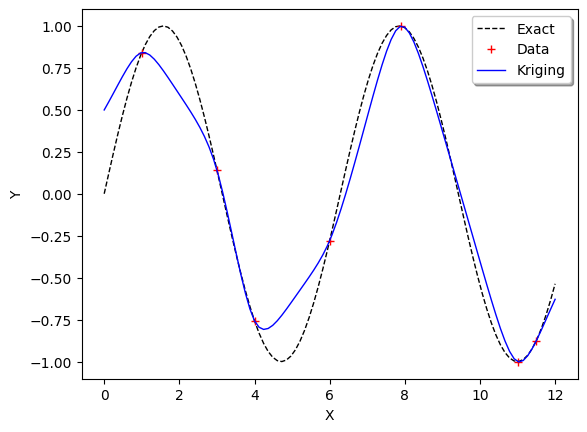

In [15]:
graph = ot.Graph()
graph.add(plot_data_test(x_test,y_test))
graph.add(plot_data_train(x_train,y_train))
graph.add(plot_data_kriging(x_test,y_test_MM))
graph.setAxes(True)
graph.setXTitle("X")
graph.setYTitle("Y")
graph.setLegendPosition("topright")
view = viewer.View(graph)

##  Retour à l'étude de la barrière thermique

On importe les données, stockées dans un fichier csv.

In [16]:
df = pd.read_csv("repres_classe_10.csv")
df

,Unnamed: 0,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
0,0,0.001162,0.002446,0.003696,0.005015,0.006398,0.007906,0.009497,0.011183,0.013074,...,0.012954,0.012953,0.012953,0.012953,0.012872,0.009666,0.006887,0.004577,0.002470,0.000611
1,1,0.002138,0.004587,0.006571,0.008475,0.010502,0.012448,0.014407,0.016441,0.018731,...,0.016596,0.016596,0.016595,0.016588,0.015602,0.010599,0.007079,0.005450,0.004471,0.002728
2,2,0.002137,0.004567,0.006154,0.008793,0.011917,0.016029,0.020296,0.024558,0.029593,...,0.033868,0.033772,0.033619,0.033180,0.031944,0.029700,0.023601,0.018639,0.013999,0.009233
3,3,0.001581,0.003401,0.004997,0.006474,0.008071,0.009671,0.011282,0.012975,0.014744,...,0.013313,0.013312,0.013312,0.013305,0.012892,0.009273,0.007533,0.006406,0.005317,0.003947
4,4,0.001005,0.002130,0.003184,0.004343,0.005578,0.006919,0.008362,0.009886,0.011570,...,0.011807,0.011801,0.011800,0.011798,0.011551,0.008989,0.006667,0.004686,0.002907,0.001317
5,5,0.001381,0.002721,0.004167,0.005686,0.007194,0.008799,0.010524,0.012411,0.014530,...,0.014472,0.014460,0.014459,0.014448,0.013919,0.010402,0.007384,0.005103,0.003139,0.001680
6,6,0.001971,0.004096,0.005487,0.007681,0.009888,0.011819,0.013897,0.016384,0.019273,...,0.018942,0.018844,0.018810,0.018706,0.017766,0.014718,0.011564,0.009216,0.007842,0.006447
7,7,0.002406,0.005184,0.007807,0.009977,0.011693,0.014049,0.016573,0.019337,0.022359,...,0.021701,0.021701,0.021701,0.021698,0.020109,0.014898,0.010204,0.006735,0.004740,0.002937
8,8,0.001941,0.003707,0.005887,0.008193,0.010741,0.013524,0.016319,0.019417,0.023172,...,0.025228,0.025128,0.025003,0.024793,0.023751,0.020677,0.016273,0.012979,0.010462,0.007453
9,9,0.001115,0.002363,0.003559,0.004817,0.006136,0.007564,0.009077,0.010675,0.012433,...,0.012366,0.012366,0.012366,0.012365,0.012176,0.009269,0.006693,0.004507,0.002514,0.000723


Les 10 lignes représentent les 10 classes et les 29 colonnes représentent les modèles associées aux modèles de chaque classe.
**Attention : la première colonne est la classe représentée, les suivantes sont les timeseries associées**

In [17]:
dg = pd.read_csv("repres_classe_15.csv")
dg

,Unnamed: 0,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
0,0,0.001180,0.002475,0.003732,0.005067,0.006474,0.008011,0.009634,0.011360,0.013311,...,0.013199,0.013203,0.013203,0.013203,0.013203,0.009838,0.006967,0.004522,0.002332,0.000241
1,1,0.001930,0.003637,0.005577,0.007839,0.010149,0.012145,0.014266,0.016946,0.019981,...,0.020641,0.020558,0.020526,0.020388,0.019448,0.017265,0.012739,0.010615,0.008349,0.006868
2,2,0.002063,0.004446,0.005905,0.008399,0.011094,0.014704,0.018717,0.022571,0.027053,...,0.031012,0.030823,0.030760,0.030625,0.029277,0.026447,0.021385,0.016768,0.012894,0.008753
3,3,0.001014,0.002155,0.003261,0.004427,0.005666,0.007017,0.008467,0.010001,0.011696,...,0.011872,0.011867,0.011866,0.011864,0.011603,0.009033,0.006666,0.004653,0.002842,0.001199
4,4,0.001603,0.003355,0.004735,0.006537,0.008299,0.010049,0.011753,0.013585,0.015749,...,0.015484,0.015484,0.015484,0.015477,0.014821,0.010872,0.007893,0.005665,0.004545,0.002371
5,5,0.001246,0.002651,0.003933,0.005278,0.006713,0.008212,0.009779,0.011456,0.013281,...,0.012931,0.012925,0.012925,0.012918,0.012547,0.009438,0.007129,0.005580,0.004066,0.002679
6,6,0.001117,0.002365,0.003574,0.004839,0.006160,0.007593,0.009112,0.010715,0.012475,...,0.012366,0.012366,0.012366,0.012366,0.012249,0.009287,0.006680,0.004468,0.002442,0.000516
7,7,0.001674,0.003608,0.005354,0.006855,0.008399,0.010020,0.011622,0.013322,0.015162,...,0.013911,0.013911,0.013911,0.013906,0.013324,0.009488,0.007518,0.006469,0.005394,0.004007
8,8,0.001970,0.003875,0.005889,0.008196,0.010734,0.013626,0.016457,0.019658,0.023245,...,0.026342,0.026230,0.026190,0.026116,0.024953,0.020883,0.017194,0.013196,0.010627,0.006981
9,9,0.002203,0.004736,0.006523,0.008407,0.010600,0.012723,0.014846,0.017098,0.019845,...,0.018313,0.018313,0.018313,0.018312,0.017233,0.011887,0.008569,0.005931,0.004723,0.002773


Ecrivons une fonction qui prend en entrée un modèle (qui représente une famille) et renvoie son métamodèle.

Je ne suis pas sûr de connaître la forme des données, mais si ce sont des tableaux (et je pense que c'est le cas...) :

In [18]:
def metamodele(sampleX, sampleY):
    # Mise en forme
    sampleX = sampleX.reshape((len(sampleX),1))
    sampleY = sampleY.to_numpy()
    sampleY = sampleY.reshape((len(sampleY),1))
    # Création de l'algorithme
    basis = ot.ConstantBasisFactory(dimension).build()
    covarianceModel = ot.SquaredExponential([1.0])
    covarianceModel.setActiveParameter([])
    algo = ot.KrigingAlgorithm(sampleX, sampleY, covarianceModel, basis)
    algo.run()
    # Obtention du métamodèle
    result = algo.getResult()
    return result.getMetaModel()

On passe directement au tracé.

In [19]:
def tracer(x_test, y_test):
    
    x_test = x_test.reshape((len(x_test),1))
    y_test = y_test.to_numpy()
    y_test = y_test.reshape((len(y_test),1))
    
    dimension = 1
    basis = ot.ConstantBasisFactory(dimension).build()
    covarianceModel = ot.MaternModel([1.]*dimension, 1.5)
    algo = ot.KrigingAlgorithm(x_test, y_test, covarianceModel, basis)
    algo.run()
    krigingResult = algo.getResult()
    
    krigeageMM = krigingResult.getMetaModel()
    y_test_MM = krigeageMM(x_test)
    
    graph = ot.Graph()
    graph.add(plot_data_test(x_test,y_test))
    graph.add(plot_data_train(x_test,y_test))
    graph.add(plot_data_kriging(x_test,y_test_MM))
    graph.setAxes(True)
    graph.setXTitle("time")
    graph.setYTitle("epsilon")
    graph.setLegendPosition("topright")
    view = viewer.View(graph)

Construisons le tableau des temps (sampleX).

In [20]:
sampleX = np.array(df.columns[1:], dtype = float)
sampleX

array([  30.,   60.,   90.,  120.,  150.,  180.,  210.,  240.,  270.,
        300.,  400.,  500.,  600.,  606.,  612.,  618.,  624.,  630.,
       1230., 1830., 2430., 3030., 3630., 3690., 3750., 3810., 3870.,
       3930.])

Traçons chaque métamodèle pour chaque courbe. Commençons par la première.

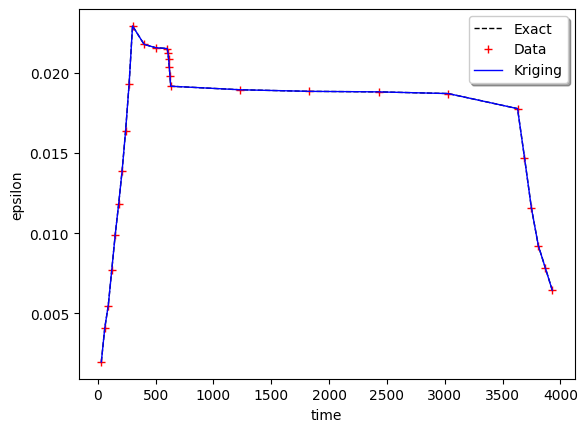

In [21]:
#Choix de la famille
famille = 6

#Tracé
sampleY = df.iloc[famille,1:]
meta = metamodele(sampleX, sampleY)
tracer(sampleX, sampleY)

## Autre test parce qu'on n'est jamais trop prudent

On va créer un métamodèle de la fonction logarithme népérien.

In [22]:
f = np.log
X_test = np.linspace(0.0001,5.,100)       # Test : on teste le krigeage avec (donc pas de ploat)
X_test = X_test.reshape((100,1))
Y_test = f(X_test)

In [23]:
X_train = 5*np.random.random((len(X_test),1))  # Train : on ploat le krigeage avec
Y_train = f(X_train)
#N_train = X_train.getSize()

In [28]:
xmin = 0.0001
xmax = 5.
N_test = 100
step = (xmax-xmin)/(N_test-1)
myRegularGrid = ot.RegularGrid(xmin, step, N_test)

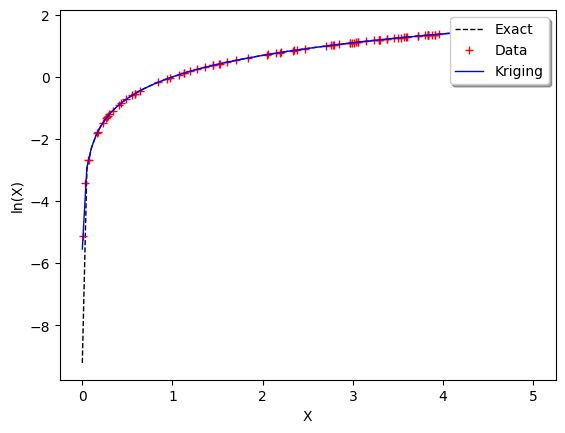

In [26]:
dimension = 1
basis = ot.ConstantBasisFactory(dimension).build()
covarianceModel = ot.MaternModel([1.]*dimension, 1.5)
algo = ot.KrigingAlgorithm(X_train, Y_train, covarianceModel, basis)
algo.run()
krigingResult = algo.getResult()
    
krigeageMM = krigingResult.getMetaModel()
Y_test_MM = krigeageMM(X_test)

graph = ot.Graph()
graph.add(plot_data_test(X_test,Y_test))
graph.add(plot_data_train(X_train,Y_train))
graph.add(plot_data_kriging(X_test,Y_test_MM))
graph.setAxes(True)
graph.setXTitle("X")
graph.setYTitle("ln(X)")
graph.setLegendPosition("topright")
view = viewer.View(graph)